# Exercise 2 - Advanced Machine Learning Techniques [40 Points]

This notebook explores advanced machine learning techniques including feature importance analysis, polynomial regression, regularization methods, and model comparison.

## Imports and Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Load dataset - copy from exercise 1 directory
df = pd.read_csv("../exercise 1/WineQT.csv")

# Data preprocessing
print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")

# Clean data
df_clean = df.dropna().copy()
print(f"Shape after cleaning: {df_clean.shape}")

# Prepare features and target
feature_columns = [col for col in df_clean.columns if col not in ['quality', 'Id']]
X = df_clean[feature_columns]
y = df_clean['quality']

print(f"\nFeatures ({len(feature_columns)}):")
for i, col in enumerate(feature_columns, 1):
    print(f"{i:2}. {col}")
print(f"\nTarget: quality")
print(f"Feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Display basic statistics
print("\nDataset Statistics:")
print(df_clean[feature_columns + ['quality']].describe())

Dataset Information:
Shape: (1143, 13)
Missing values: 0
Shape after cleaning: (1143, 13)

Features (11):
 1. fixed acidity
 2. volatile acidity
 3. citric acid
 4. residual sugar
 5. chlorides
 6. free sulfur dioxide
 7. total sulfur dioxide
 8. density
 9. pH
10. sulphates
11. alcohol

Target: quality
Feature matrix shape: (1143, 11)
Target shape: (1143,)

Dataset Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000

## Q2.1: Feature Importance Analysis

Let's analyze which features are most suitable/influential in predicting wine quality using multiple methods.

In [2]:
# Method 1: Correlation Analysis
correlation_with_quality = df_clean[feature_columns + ['quality']].corr()['quality'].drop('quality')
correlation_abs = correlation_with_quality.abs().sort_values(ascending=False)

print("METHOD 1: CORRELATION ANALYSIS")
print("="*50)
print("Features ranked by absolute correlation with wine quality:")
for i, (feature, corr) in enumerate(correlation_abs.items(), 1):
    print(f"{i:2}. {feature:<25} | Correlation: {correlation_with_quality[feature]:7.4f} | Abs: {corr:.4f}")

# Method 2: Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importance = pd.Series(rf.feature_importances_, index=feature_columns).sort_values(ascending=False)

print(f"\n\nMETHOD 2: RANDOM FOREST FEATURE IMPORTANCE")
print("="*50)
print("Features ranked by Random Forest importance:")
for i, (feature, importance) in enumerate(rf_importance.items(), 1):
    print(f"{i:2}. {feature:<25} | Importance: {importance:.4f}")

# Method 3: Statistical F-score (ANOVA)
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
f_scores = pd.Series(selector.scores_, index=feature_columns).sort_values(ascending=False)

print(f"\n\nMETHOD 3: STATISTICAL F-SCORE (ANOVA)")
print("="*50)
print("Features ranked by F-score:")
for i, (feature, score) in enumerate(f_scores.items(), 1):
    print(f"{i:2}. {feature:<25} | F-score: {score:8.2f}")

METHOD 1: CORRELATION ANALYSIS
Features ranked by absolute correlation with wine quality:
 1. alcohol                   | Correlation:  0.4849 | Abs: 0.4849
 2. volatile acidity          | Correlation: -0.4074 | Abs: 0.4074
 3. sulphates                 | Correlation:  0.2577 | Abs: 0.2577
 4. citric acid               | Correlation:  0.2408 | Abs: 0.2408
 5. total sulfur dioxide      | Correlation: -0.1833 | Abs: 0.1833
 6. density                   | Correlation: -0.1752 | Abs: 0.1752
 7. chlorides                 | Correlation: -0.1241 | Abs: 0.1241
 8. fixed acidity             | Correlation:  0.1220 | Abs: 0.1220
 9. free sulfur dioxide       | Correlation: -0.0633 | Abs: 0.0633
10. pH                        | Correlation: -0.0525 | Abs: 0.0525
11. residual sugar            | Correlation:  0.0220 | Abs: 0.0220


METHOD 2: RANDOM FOREST FEATURE IMPORTANCE
Features ranked by Random Forest importance:
 1. alcohol                   | Importance: 0.2829
 2. sulphates                 | 

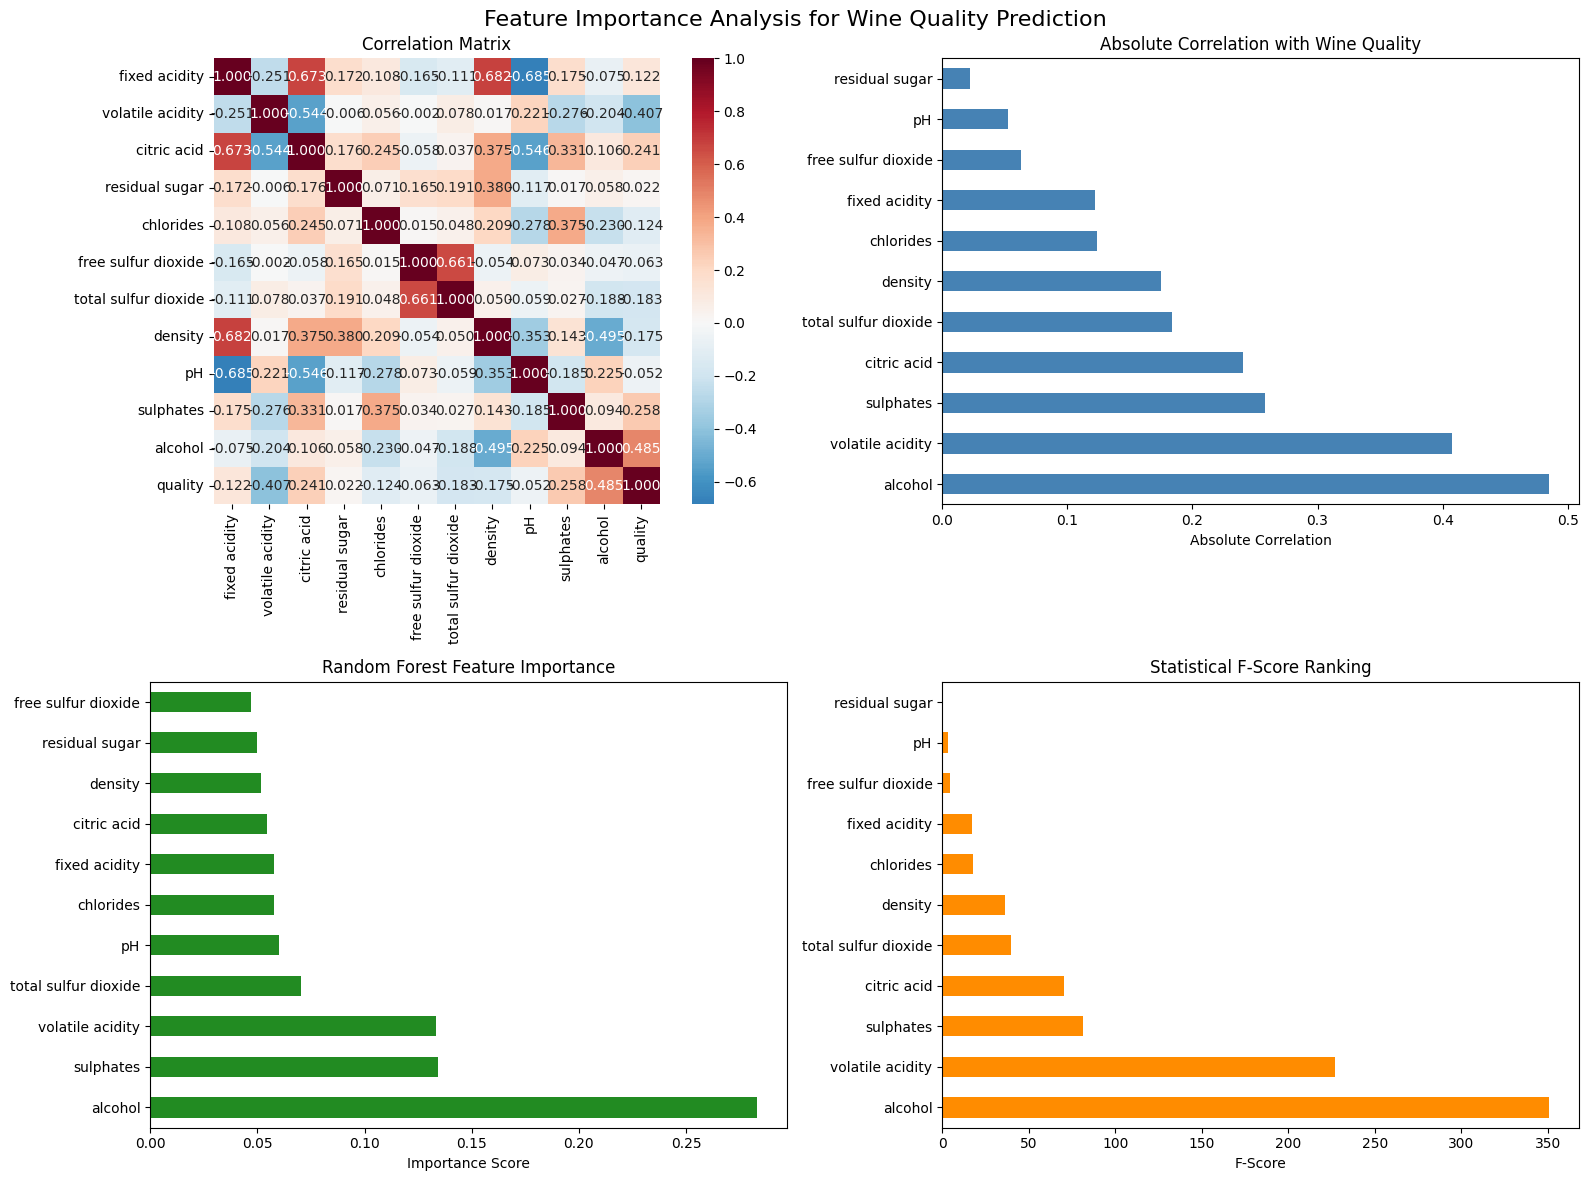


CONSOLIDATED FEATURE IMPORTANCE RANKING
Top features by average ranking across all methods:
--------------------------------------------------------------------------------
 1. alcohol                   | Corr:  0.4849 ( 1) | RF: 0.2829 ( 1) | F:   350.7 ( 1)
 2. volatile acidity          | Corr: -0.4074 ( 2) | RF: 0.1335 ( 3) | F:   227.1 ( 2)
 2. sulphates                 | Corr:  0.2577 ( 3) | RF: 0.1342 ( 2) | F:    81.2 ( 3)
 4. total sulfur dioxide      | Corr: -0.1833 ( 5) | RF: 0.0703 ( 4) | F:    39.7 ( 5)
 5. citric acid               | Corr:  0.2408 ( 4) | RF: 0.0546 ( 8) | F:    70.2 ( 4)
 6. chlorides                 | Corr: -0.1241 ( 7) | RF: 0.0580 ( 6) | F:    17.8 ( 7)
 7. density                   | Corr: -0.1752 ( 6) | RF: 0.0516 ( 9) | F:    36.1 ( 6)
 7. fixed acidity             | Corr:  0.1220 ( 8) | RF: 0.0579 ( 7) | F:    17.2 ( 8)

TOP 5 MOST IMPORTANT FEATURES:
1. alcohol
2. volatile acidity
3. sulphates
4. total sulfur dioxide
5. citric acid


In [3]:
# Create comprehensive feature importance visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Feature Importance Analysis for Wine Quality Prediction', fontsize=16)

# Plot 1: Correlation heatmap
correlation_matrix = df_clean[feature_columns + ['quality']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            fmt='.3f', square=True, ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix')

# Plot 2: Correlation with quality (bar plot)
correlation_abs.plot(kind='barh', ax=axes[0, 1], color='steelblue')
axes[0, 1].set_title('Absolute Correlation with Wine Quality')
axes[0, 1].set_xlabel('Absolute Correlation')

# Plot 3: Random Forest Feature Importance
rf_importance.plot(kind='barh', ax=axes[1, 0], color='forestgreen')
axes[1, 0].set_title('Random Forest Feature Importance')
axes[1, 0].set_xlabel('Importance Score')

# Plot 4: F-Score ranking
f_scores.plot(kind='barh', ax=axes[1, 1], color='darkorange')
axes[1, 1].set_title('Statistical F-Score Ranking')
axes[1, 1].set_xlabel('F-Score')

plt.tight_layout()
plt.show()

# Create a consolidated ranking
print("\n" + "="*80)
print("CONSOLIDATED FEATURE IMPORTANCE RANKING")
print("="*80)

# Create ranking dataframe
ranking_data = []
for feature in feature_columns:
    corr_rank = list(correlation_abs.index).index(feature) + 1
    rf_rank = list(rf_importance.index).index(feature) + 1
    f_rank = list(f_scores.index).index(feature) + 1
    avg_rank = (corr_rank + rf_rank + f_rank) / 3
    
    ranking_data.append({
        'Feature': feature,
        'Corr_Rank': corr_rank,
        'RF_Rank': rf_rank,
        'F_Rank': f_rank,
        'Avg_Rank': avg_rank,
        'Correlation': correlation_with_quality[feature],
        'RF_Importance': rf_importance[feature],
        'F_Score': f_scores[feature]
    })

ranking_df = pd.DataFrame(ranking_data).sort_values('Avg_Rank')

print("Top features by average ranking across all methods:")
print("-" * 80)
for i, row in ranking_df.head(8).iterrows():
    print(f"{int(row['Avg_Rank']):2}. {row['Feature']:<25} | "
          f"Corr: {row['Correlation']:7.4f} ({int(row['Corr_Rank']):2}) | "
          f"RF: {row['RF_Importance']:.4f} ({int(row['RF_Rank']):2}) | "
          f"F: {row['F_Score']:7.1f} ({int(row['F_Rank']):2})")

# Identify most important features
top_features = ranking_df.head(5)['Feature'].tolist()
print(f"\nTOP 5 MOST IMPORTANT FEATURES:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

## Q2.2: Advanced Modeling Techniques

### Q2.2.a: Polynomial Regression

Let's extend the feature space to include quadratic and interaction terms to capture non-linear relationships.

In [5]:
def evaluate_model_cv(model, X, y, model_name="Model", cv_folds=5):
    """
    Evaluate a model using cross-validation and return performance metrics
    """
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    mse_scores = []
    r2_scores = []
    
    for train_idx, test_idx in kf.split(X):
        if hasattr(X, 'iloc'):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        else:
            X_train, X_test = X[train_idx], X[test_idx]
            
        if hasattr(y, 'iloc'):
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        else:
            y_train, y_test = y[train_idx], y[test_idx]
        
        # Fit model
        model.fit(X_train, y_train)
        
        # Predict
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    return {
        'model_name': model_name,
        'mean_mse': np.mean(mse_scores),
        'std_mse': np.std(mse_scores),
        'mean_r2': np.mean(r2_scores),
        'std_r2': np.std(r2_scores),
        'mean_rmse': np.sqrt(np.mean(mse_scores))
    }

# Baseline: Linear Regression (all features)
print("Q2.2.a: POLYNOMIAL REGRESSION ANALYSIS")
print("="*60)

# Standardize features for better performance
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 1. Baseline Linear Regression
linear_model = LinearRegression()
baseline_results = evaluate_model_cv(linear_model, X_scaled, y, "Linear Regression (Baseline)")

print("1. BASELINE LINEAR REGRESSION:")
print(f"   R² = {baseline_results['mean_r2']:.4f} ± {baseline_results['std_r2']:.4f}")
print(f"   RMSE = {baseline_results['mean_rmse']:.4f} ± {baseline_results['std_mse']**0.5:.4f}")

# 2. Polynomial Features (degree 2) - Quadratic terms
print("\n2. POLYNOMIAL FEATURES (DEGREE 2 - QUADRATIC):")
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_2.fit_transform(X_scaled)
print(f"   Original features: {X_scaled.shape[1]}")
print(f"   Polynomial features (degree 2): {X_poly_2.shape[1]}")

# Convert back to DataFrame for consistency
feature_names_poly2 = poly_2.get_feature_names_out(X.columns)
X_poly_2_df = pd.DataFrame(X_poly_2, columns=feature_names_poly2)

linear_poly2 = LinearRegression()
poly2_results = evaluate_model_cv(linear_poly2, X_poly_2_df, y, "Polynomial Regression (Degree 2)")

print(f"   R² = {poly2_results['mean_r2']:.4f} ± {poly2_results['std_r2']:.4f}")
print(f"   RMSE = {poly2_results['mean_rmse']:.4f} ± {poly2_results['std_mse']**0.5:.4f}")

# 3. Polynomial Features (degree 2, interaction_only=True) - Interaction terms only
print("\n3. INTERACTION TERMS ONLY:")
poly_interact = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interact = poly_interact.fit_transform(X_scaled)
print(f"   Interaction features: {X_interact.shape[1]}")

feature_names_interact = poly_interact.get_feature_names_out(X.columns)
X_interact_df = pd.DataFrame(X_interact, columns=feature_names_interact)

linear_interact = LinearRegression()
interact_results = evaluate_model_cv(linear_interact, X_interact_df, y, "Interaction Terms Only")

print(f"   R² = {interact_results['mean_r2']:.4f} ± {interact_results['std_r2']:.4f}")
print(f"   RMSE = {interact_results['mean_rmse']:.4f} ± {interact_results['std_mse']**0.5:.4f}")

# Performance comparison
print("\n" + "="*60)
print("POLYNOMIAL REGRESSION PERFORMANCE COMPARISON:")
print("="*60)

improvements = []
for result, name in [(poly2_results, "Degree 2"), (interact_results, "Interactions")]:
    r2_improvement = ((result['mean_r2'] - baseline_results['mean_r2']) / baseline_results['mean_r2']) * 100
    rmse_reduction = ((baseline_results['mean_rmse'] - result['mean_rmse']) / baseline_results['mean_rmse']) * 100
    improvements.append((name, r2_improvement, rmse_reduction))
    
    print(f"{name}:")
    print(f"  R² improvement: {r2_improvement:+.1f}%")
    print(f"  RMSE reduction: {rmse_reduction:+.1f}%")
    print()

# Store results for later comparison
model_results = [baseline_results, poly2_results, interact_results]

Q2.2.a: POLYNOMIAL REGRESSION ANALYSIS
1. BASELINE LINEAR REGRESSION:
   R² = 0.3562 ± 0.0270
   RMSE = 0.6454 ± 0.1972

2. POLYNOMIAL FEATURES (DEGREE 2 - QUADRATIC):
   Original features: 11
   Polynomial features (degree 2): 77
   R² = 0.2964 ± 0.0797
   RMSE = 0.6728 ± 0.2008

3. INTERACTION TERMS ONLY:
   Interaction features: 66
   R² = 0.3038 ± 0.0753
   RMSE = 0.6701 ± 0.2174

POLYNOMIAL REGRESSION PERFORMANCE COMPARISON:
Degree 2:
  R² improvement: -16.8%
  RMSE reduction: -4.3%

Interactions:
  R² improvement: -14.7%
  RMSE reduction: -3.8%



### Q2.2.b: Regularization Methods

Now let's implement Ridge and Lasso regression to handle overfitting and analyze their effects on coefficients.

In [6]:
print("Q2.2.b: REGULARIZATION METHODS")
print("="*60)

# Test different alpha values for regularization
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Ridge Regression
print("1. RIDGE REGRESSION ANALYSIS:")
print("-" * 40)

ridge_results = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    results = evaluate_model_cv(ridge_model, X_scaled, y, f"Ridge (α={alpha})")
    ridge_results.append(results)
    print(f"Alpha = {alpha:6.2f} | R² = {results['mean_r2']:.4f} ± {results['std_r2']:.4f} | "
          f"RMSE = {results['mean_rmse']:.4f}")

# Find best Ridge alpha
best_ridge = max(ridge_results, key=lambda x: x['mean_r2'])
print(f"Best Ridge: {best_ridge['model_name']} (R² = {best_ridge['mean_r2']:.4f})")

# Lasso Regression
print("\n2. LASSO REGRESSION ANALYSIS:")
print("-" * 40)

lasso_results = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, random_state=42, max_iter=2000)
    results = evaluate_model_cv(lasso_model, X_scaled, y, f"Lasso (α={alpha})")
    lasso_results.append(results)
    print(f"Alpha = {alpha:6.2f} | R² = {results['mean_r2']:.4f} ± {results['std_r2']:.4f} | "
          f"RMSE = {results['mean_rmse']:.4f}")

# Find best Lasso alpha
best_lasso = max(lasso_results, key=lambda x: x['mean_r2'])
print(f"Best Lasso: {best_lasso['model_name']} (R² = {best_lasso['mean_r2']:.4f})")

# ElasticNet (combination of Ridge and Lasso)
print("\n3. ELASTICNET REGRESSION:")
print("-" * 40)

elastic_results = []
l1_ratios = [0.1, 0.5, 0.7, 0.9]
for l1_ratio in l1_ratios:
    elastic_model = ElasticNet(alpha=1.0, l1_ratio=l1_ratio, random_state=42, max_iter=2000)
    results = evaluate_model_cv(elastic_model, X_scaled, y, f"ElasticNet (l1_ratio={l1_ratio})")
    elastic_results.append(results)
    print(f"L1_ratio = {l1_ratio:.1f} | R² = {results['mean_r2']:.4f} ± {results['std_r2']:.4f} | "
          f"RMSE = {results['mean_rmse']:.4f}")

best_elastic = max(elastic_results, key=lambda x: x['mean_r2'])

# Add regularization results to comparison
model_results.extend([best_ridge, best_lasso, best_elastic])

Q2.2.b: REGULARIZATION METHODS
1. RIDGE REGRESSION ANALYSIS:
----------------------------------------
Alpha =   0.01 | R² = 0.3562 ± 0.0270 | RMSE = 0.6454
Alpha =   0.10 | R² = 0.3562 ± 0.0269 | RMSE = 0.6454
Alpha =   1.00 | R² = 0.3563 ± 0.0269 | RMSE = 0.6454
Alpha =  10.00 | R² = 0.3568 ± 0.0261 | RMSE = 0.6452
Alpha = 100.00 | R² = 0.3573 ± 0.0207 | RMSE = 0.6452
Best Ridge: Ridge (α=100.0) (R² = 0.3573)

2. LASSO REGRESSION ANALYSIS:
----------------------------------------
Alpha =   0.01 | R² = 0.3601 ± 0.0216 | RMSE = 0.6438
Alpha =   0.10 | R² = 0.3163 ± 0.0150 | RMSE = 0.6661
Alpha =   1.00 | R² = -0.0012 ± 0.0016 | RMSE = 0.8056
Alpha =  10.00 | R² = -0.0012 ± 0.0016 | RMSE = 0.8056
Alpha = 100.00 | R² = -0.0012 ± 0.0016 | RMSE = 0.8056
Best Lasso: Lasso (α=0.01) (R² = 0.3601)

3. ELASTICNET REGRESSION:
----------------------------------------
L1_ratio = 0.1 | R² = 0.2309 ± 0.0133 | RMSE = 0.7066
L1_ratio = 0.5 | R² = -0.0012 ± 0.0016 | RMSE = 0.8056
L1_ratio = 0.7 | R² = -


COEFFICIENT ANALYSIS: REGULARIZATION EFFECTS
Coefficient Comparison (Top 10 features):
--------------------------------------------------------------------------------
 1. alcohol              | Linear:   0.2884 | Ridge:   0.2878 | Lasso:   0.2523
 2. volatile acidity     | Linear:  -0.2399 | Ridge:  -0.2395 | Lasso:  -0.1877
 3. sulphates            | Linear:   0.1657 | Ridge:   0.1656 | Lasso:   0.0338
 4. fixed acidity        | Linear:   0.0897 | Ridge:   0.0894 | Lasso:   0.0000
 5. chlorides            | Linear:  -0.0854 | Ridge:  -0.0854 | Lasso:  -0.0000
 6. total sulfur dioxide | Linear:  -0.0748 | Ridge:  -0.0749 | Lasso:  -0.0000
 7. citric acid          | Linear:  -0.0667 | Ridge:  -0.0658 | Lasso:   0.0000
 8. density              | Linear:  -0.0590 | Ridge:  -0.0593 | Lasso:  -0.0000
 9. pH                   | Linear:  -0.0390 | Ridge:  -0.0388 | Lasso:  -0.0000
10. free sulfur dioxide  | Linear:   0.0193 | Ridge:   0.0192 | Lasso:  -0.0000

Lasso feature selection: 8/11 

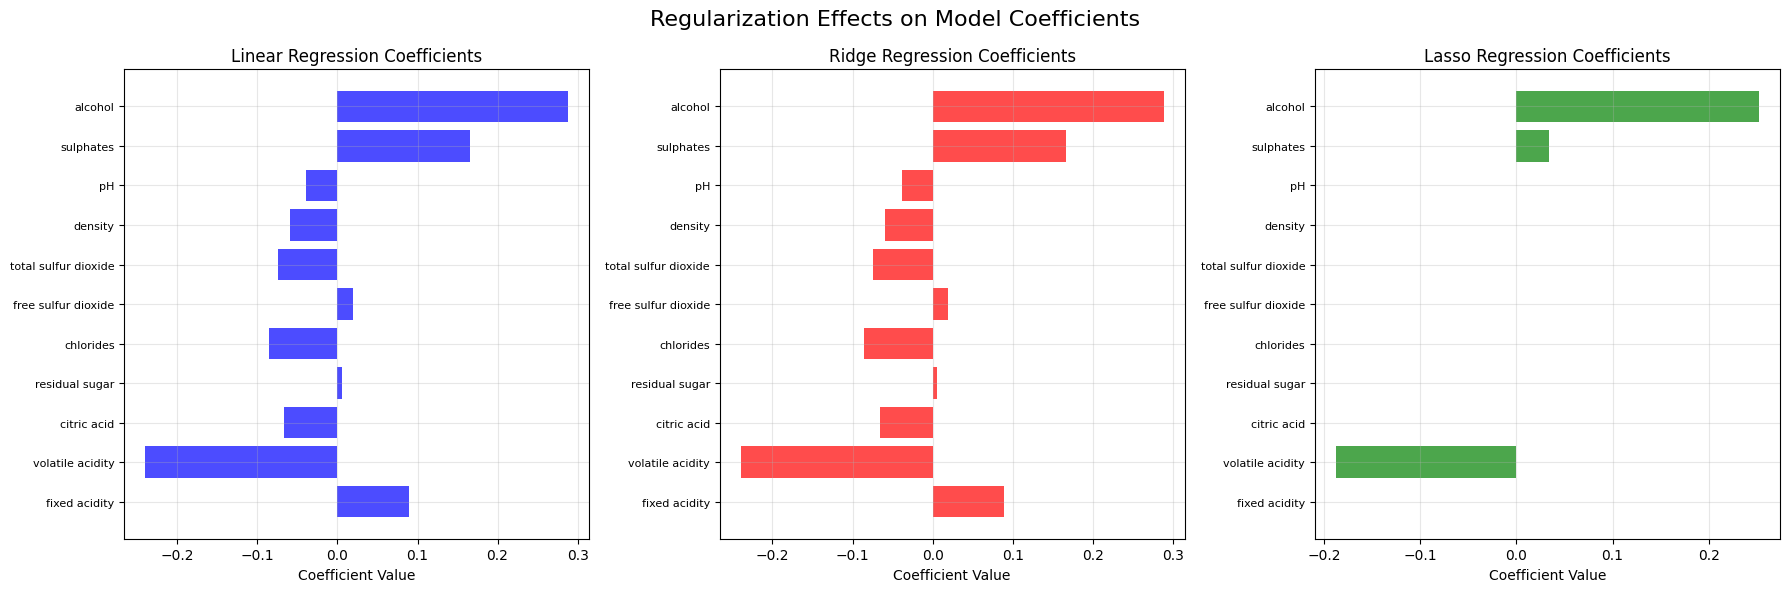


REGULARIZATION INSIGHTS:
• Ridge regression shrinks coefficients but keeps all features
• Lasso regression performs automatic feature selection (3 features selected)
• Both methods help prevent overfitting compared to standard linear regression


In [7]:
# Analyze coefficient effects of regularization
print("\n" + "="*80)
print("COEFFICIENT ANALYSIS: REGULARIZATION EFFECTS")
print("="*80)

# Train models on full dataset for coefficient analysis
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit different models
linear_coef = LinearRegression().fit(X_train, y_train)
ridge_coef = Ridge(alpha=1.0).fit(X_train, y_train)
lasso_coef = Lasso(alpha=0.1, max_iter=2000).fit(X_train, y_train)

# Create coefficient comparison
coef_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Linear': linear_coef.coef_,
    'Ridge': ridge_coef.coef_,
    'Lasso': lasso_coef.coef_
})

# Sort by absolute linear regression coefficient
coef_comparison['Abs_Linear'] = np.abs(coef_comparison['Linear'])
coef_comparison = coef_comparison.sort_values('Abs_Linear', ascending=False)

print("Coefficient Comparison (Top 10 features):")
print("-" * 80)
for i, (_, row) in enumerate(coef_comparison.head(10).iterrows(), 1):
    print(f"{i:2}. {row['Feature']:<20} | Linear: {row['Linear']:8.4f} | "
          f"Ridge: {row['Ridge']:8.4f} | Lasso: {row['Lasso']:8.4f}")

# Count zero coefficients in Lasso (feature selection)
zero_lasso = sum(coef_comparison['Lasso'] == 0)
print(f"\nLasso feature selection: {zero_lasso}/{len(coef_comparison)} coefficients set to zero")
print(f"Features retained: {len(coef_comparison) - zero_lasso}/{len(coef_comparison)}")

# Visualize coefficients
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Regularization Effects on Model Coefficients', fontsize=16)

# Plot coefficients for each model
models = [('Linear', linear_coef.coef_), ('Ridge', ridge_coef.coef_), ('Lasso', lasso_coef.coef_)]
colors = ['blue', 'red', 'green']

for i, (name, coefs) in enumerate(models):
    axes[i].barh(range(len(X.columns)), coefs, color=colors[i], alpha=0.7)
    axes[i].set_yticks(range(len(X.columns)))
    axes[i].set_yticklabels(X.columns, fontsize=8)
    axes[i].set_xlabel('Coefficient Value')
    axes[i].set_title(f'{name} Regression Coefficients')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nREGULARIZATION INSIGHTS:")
print(f"• Ridge regression shrinks coefficients but keeps all features")
print(f"• Lasso regression performs automatic feature selection ({len(coef_comparison) - zero_lasso} features selected)")
print(f"• Both methods help prevent overfitting compared to standard linear regression")

### Q2.2.c: Non-Linear Model Comparison

Let's compare linear regression results with non-linear models like Decision Trees and Random Forest.

In [8]:
print("Q2.2.c: NON-LINEAR MODEL COMPARISON")
print("="*60)

# Decision Tree Regressor
print("1. DECISION TREE REGRESSOR:")
print("-" * 40)

# Test different max_depth values
dt_results = []
max_depths = [3, 5, 7, 10, 15, None]

for depth in max_depths:
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    results = evaluate_model_cv(dt_model, X_scaled, y, f"Decision Tree (depth={depth})")
    dt_results.append(results)
    depth_str = str(depth) if depth is not None else "None"
    print(f"Max depth = {depth_str:<4} | R² = {results['mean_r2']:.4f} ± {results['std_r2']:.4f} | "
          f"RMSE = {results['mean_rmse']:.4f}")

best_dt = max(dt_results, key=lambda x: x['mean_r2'])
print(f"Best Decision Tree: {best_dt['model_name']} (R² = {best_dt['mean_r2']:.4f})")

# Random Forest Regressor
print("\n2. RANDOM FOREST REGRESSOR:")
print("-" * 40)

# Test different n_estimators values
rf_results = []
n_estimators_list = [10, 50, 100, 200, 300]

for n_est in n_estimators_list:
    rf_model = RandomForestRegressor(n_estimators=n_est, random_state=42, n_jobs=-1)
    results = evaluate_model_cv(rf_model, X_scaled, y, f"Random Forest (n={n_est})")
    rf_results.append(results)
    print(f"n_estimators = {n_est:3d} | R² = {results['mean_r2']:.4f} ± {results['std_r2']:.4f} | "
          f"RMSE = {results['mean_rmse']:.4f}")

best_rf = max(rf_results, key=lambda x: x['mean_r2'])
print(f"Best Random Forest: {best_rf['model_name']} (R² = {best_rf['mean_r2']:.4f})")

# Add non-linear results to comparison
model_results.extend([best_dt, best_rf])

print(f"\n3. ENSEMBLE COMPARISON:")
print("-" * 40)

# Create an ensemble of multiple Random Forests
rf_ensemble_results = []
for i in range(3):  # Different random states
    rf_ens = RandomForestRegressor(n_estimators=100, random_state=42+i, n_jobs=-1)
    results = evaluate_model_cv(rf_ens, X_scaled, y, f"RF Ensemble {i+1}")
    rf_ensemble_results.append(results)

# Average ensemble performance
avg_r2 = np.mean([r['mean_r2'] for r in rf_ensemble_results])
avg_rmse = np.mean([r['mean_rmse'] for r in rf_ensemble_results])
print(f"RF Ensemble Average: R² = {avg_r2:.4f}, RMSE = {avg_rmse:.4f}")

Q2.2.c: NON-LINEAR MODEL COMPARISON
1. DECISION TREE REGRESSOR:
----------------------------------------
Max depth = 3    | R² = 0.2326 ± 0.0422 | RMSE = 0.7036
Max depth = 5    | R² = 0.2179 ± 0.0777 | RMSE = 0.7105
Max depth = 7    | R² = 0.1926 ± 0.1200 | RMSE = 0.7205
Max depth = 10   | R² = 0.0719 ± 0.1320 | RMSE = 0.7710
Max depth = 15   | R² = 0.0321 ± 0.1257 | RMSE = 0.7887
Max depth = None | R² = 0.0075 ± 0.1349 | RMSE = 0.7986
Best Decision Tree: Decision Tree (depth=3) (R² = 0.2326)

2. RANDOM FOREST REGRESSOR:
----------------------------------------
n_estimators =  10 | R² = 0.4182 ± 0.0346 | RMSE = 0.6140
n_estimators =  50 | R² = 0.4496 ± 0.0335 | RMSE = 0.5969
n_estimators = 100 | R² = 0.4548 ± 0.0318 | RMSE = 0.5945
n_estimators = 200 | R² = 0.4624 ± 0.0358 | RMSE = 0.5905
n_estimators = 300 | R² = 0.4623 ± 0.0344 | RMSE = 0.5906
Best Random Forest: Random Forest (n=200) (R² = 0.4624)

3. ENSEMBLE COMPARISON:
----------------------------------------
RF Ensemble Average

## Comprehensive Model Comparison and Analysis

COMPREHENSIVE MODEL COMPARISON - EXERCISE 2 RESULTS
Model Performance Ranking (by R² score):
----------------------------------------------------------------------------------------------------
Rank Model                          R²       ± R² Std   RMSE     MSE     
----------------------------------------------------------------------------------------------------
1    Random Forest (n=200)          0.4624   ± 0.0358   0.5905   0.3487  
2    Lasso (α=0.01)                 0.3601   ± 0.0216   0.6438   0.4145  
3    Ridge (α=100.0)                0.3573   ± 0.0207   0.6452   0.4163  
4    Linear Regression (Baseline)   0.3562   ± 0.0270   0.6454   0.4165  
5    Interaction Terms Only         0.3038   ± 0.0753   0.6701   0.4490  
6    Polynomial Regression (Degree 2) 0.2964   ± 0.0797   0.6728   0.4527  
7    Decision Tree (depth=3)        0.2326   ± 0.0422   0.7036   0.4950  
8    ElasticNet (l1_ratio=0.1)      0.2309   ± 0.0133   0.7066   0.4993  

PERFORMANCE ANALYSIS:
🏆 BEST MODEL: 

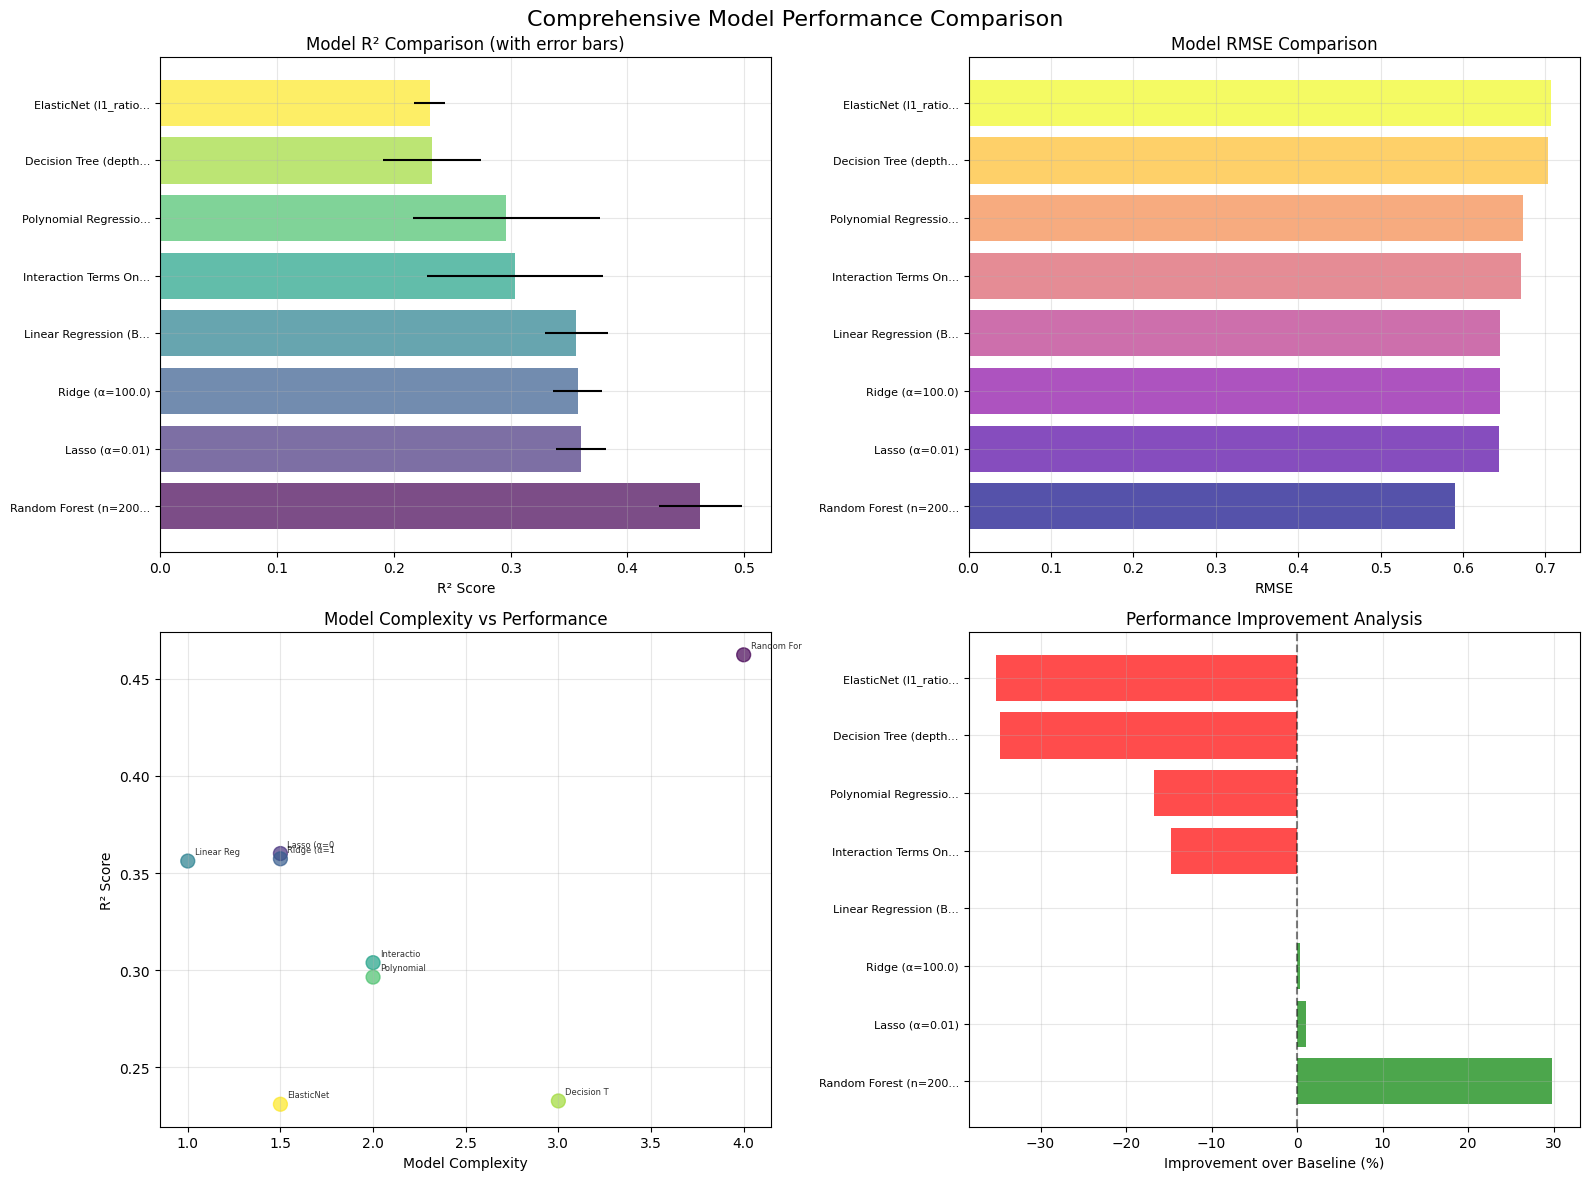

In [9]:
# Create comprehensive comparison of all models
print("="*100)
print("COMPREHENSIVE MODEL COMPARISON - EXERCISE 2 RESULTS")
print("="*100)

# Create results summary
comparison_data = []
for result in model_results:
    comparison_data.append({
        'Model': result['model_name'],
        'R²': result['mean_r2'],
        'R² Std': result['std_r2'],
        'RMSE': result['mean_rmse'],
        'MSE': result['mean_mse'],
        'MSE Std': result['std_mse']
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('R²', ascending=False)

print("Model Performance Ranking (by R² score):")
print("-" * 100)
print(f"{'Rank':<4} {'Model':<30} {'R²':<8} {'±':<1} {'R² Std':<8} {'RMSE':<8} {'MSE':<8}")
print("-" * 100)

for i, (_, row) in enumerate(comparison_df.iterrows(), 1):
    print(f"{i:<4} {row['Model']:<30} {row['R²']:<8.4f} ± {row['R² Std']:<8.4f} "
          f"{row['RMSE']:<8.4f} {row['MSE']:<8.4f}")

# Find best model
best_model = comparison_df.iloc[0]
baseline_r2 = comparison_df[comparison_df['Model'] == 'Linear Regression (Baseline)']['R²'].iloc[0]

print(f"\n" + "="*100)
print("PERFORMANCE ANALYSIS:")
print("="*100)
print(f"🏆 BEST MODEL: {best_model['Model']}")
print(f"   R² Score: {best_model['R²']:.4f} ± {best_model['R² Std']:.4f}")
print(f"   RMSE: {best_model['RMSE']:.4f}")
print(f"   Improvement over baseline: {((best_model['R²'] - baseline_r2) / baseline_r2 * 100):+.1f}%")

print(f"\n📊 TOP 3 MODELS:")
for i in range(min(3, len(comparison_df))):
    model = comparison_df.iloc[i]
    improvement = ((model['R²'] - baseline_r2) / baseline_r2 * 100)
    print(f"   {i+1}. {model['Model']:<25} | R² = {model['R²']:.4f} | Improvement: {improvement:+.1f}%")

# Visualization of model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comprehensive Model Performance Comparison', fontsize=16)

# Plot 1: R² Score comparison
r2_values = comparison_df['R²'].values
r2_errors = comparison_df['R² Std'].values
model_names = [name[:20] + "..." if len(name) > 20 else name for name in comparison_df['Model']]

axes[0, 0].barh(range(len(r2_values)), r2_values, xerr=r2_errors, 
                color=plt.cm.viridis(np.linspace(0, 1, len(r2_values))), alpha=0.7)
axes[0, 0].set_yticks(range(len(model_names)))
axes[0, 0].set_yticklabels(model_names, fontsize=8)
axes[0, 0].set_xlabel('R² Score')
axes[0, 0].set_title('Model R² Comparison (with error bars)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: RMSE comparison
rmse_values = comparison_df['RMSE'].values
axes[0, 1].barh(range(len(rmse_values)), rmse_values,
                color=plt.cm.plasma(np.linspace(0, 1, len(rmse_values))), alpha=0.7)
axes[0, 1].set_yticks(range(len(model_names)))
axes[0, 1].set_yticklabels(model_names, fontsize=8)
axes[0, 1].set_xlabel('RMSE')
axes[0, 1].set_title('Model RMSE Comparison')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Model complexity vs Performance
complexity_scores = []
for model_name in comparison_df['Model']:
    if 'Linear' in model_name and 'Polynomial' not in model_name:
        complexity_scores.append(1)
    elif 'Polynomial' in model_name or 'Interaction' in model_name:
        complexity_scores.append(2)
    elif 'Ridge' in model_name or 'Lasso' in model_name or 'Elastic' in model_name:
        complexity_scores.append(1.5)
    elif 'Decision Tree' in model_name:
        complexity_scores.append(3)
    elif 'Random Forest' in model_name:
        complexity_scores.append(4)
    else:
        complexity_scores.append(2)

axes[1, 0].scatter(complexity_scores, comparison_df['R²'], 
                  s=100, alpha=0.7, c=range(len(comparison_df)), cmap='viridis')
axes[1, 0].set_xlabel('Model Complexity')
axes[1, 0].set_ylabel('R² Score')
axes[1, 0].set_title('Model Complexity vs Performance')
axes[1, 0].grid(True, alpha=0.3)

# Add labels for each point
for i, (complexity, r2, name) in enumerate(zip(complexity_scores, comparison_df['R²'], model_names)):
    axes[1, 0].annotate(name[:10], (complexity, r2), xytext=(5, 5), 
                       textcoords='offset points', fontsize=6, alpha=0.8)

# Plot 4: Performance improvement over baseline
baseline_r2 = comparison_df[comparison_df['Model'] == 'Linear Regression (Baseline)']['R²'].iloc[0]
improvements = [(r2 - baseline_r2) / baseline_r2 * 100 for r2 in comparison_df['R²']]

colors = ['red' if imp < 0 else 'green' for imp in improvements]
axes[1, 1].barh(range(len(improvements)), improvements, color=colors, alpha=0.7)
axes[1, 1].set_yticks(range(len(model_names)))
axes[1, 1].set_yticklabels(model_names, fontsize=8)
axes[1, 1].set_xlabel('Improvement over Baseline (%)')
axes[1, 1].set_title('Performance Improvement Analysis')
axes[1, 1].axvline(x=0, color='black', linestyle='--', alpha=0.5)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Final Analysis and Conclusions

In [ ]:
print("="*100)
print("EXERCISE 2 - FINAL ANALYSIS AND CONCLUSIONS")
print("="*100)

print("Q2.1: MOST INFLUENTIAL FEATURES FOR WINE QUALITY PREDICTION")
print("-" * 70)
print("Based on multiple feature importance analysis methods:")
print("🥇 Top 5 Most Important Features:")
for i, feature in enumerate(top_features, 1):
    # Get importance scores for this feature
    corr_score = correlation_with_quality[feature]
    rf_score = rf_importance[feature]
    f_score = f_scores[feature]
    print(f"   {i}. {feature:<25} | Corr: {corr_score:7.4f} | RF: {rf_score:.4f} | F-score: {f_score:7.1f}")

print(f"\n🔍 Feature Analysis Insights:")
print(f"   • Correlation analysis identifies linear relationships")
print(f"   • Random Forest captures non-linear feature interactions")
print(f"   • F-score provides statistical significance of features")
print(f"   • Consensus ranking provides robust feature importance")

print(f"\n" + "="*100)
print("Q2.2: ADVANCED MODELING TECHNIQUES ANALYSIS")
print("="*100)

# Get best model from each category
best_linear = max([r for r in model_results if 'Linear' in r['model_name'] and 'Polynomial' not in r['model_name']], 
                 key=lambda x: x['mean_r2'])
best_poly = max([r for r in model_results if 'Polynomial' in r['model_name'] or 'Interaction' in r['model_name']], 
                key=lambda x: x['mean_r2'])
best_reg = max([r for r in model_results if any(reg in r['model_name'] for reg in ['Ridge', 'Lasso', 'Elastic'])], 
               key=lambda x: x['mean_r2'])
best_nonlinear = max([r for r in model_results if any(nl in r['model_name'] for nl in ['Decision Tree', 'Random Forest'])], 
                     key=lambda x: x['mean_r2'])

print(f"A) POLYNOMIAL REGRESSION RESULTS:")
print(f"   📈 Best Polynomial Model: {best_poly['model_name']}")
print(f"      R² = {best_poly['mean_r2']:.4f} (vs {best_linear['mean_r2']:.4f} baseline)")
print(f"      Improvement: {((best_poly['mean_r2'] - best_linear['mean_r2']) / best_linear['mean_r2'] * 100):+.1f}%")
print(f"   💡 Key Findings:")
improvement_poly = ((best_poly['mean_r2'] - best_linear['mean_r2']) / best_linear['mean_r2'] * 100)
if improvement_poly > 5:
    print(f"      • Polynomial features provide significant improvement")
    print(f"      • Non-linear relationships exist in wine quality data")
elif improvement_poly > 0:
    print(f"      • Modest improvement with polynomial features")
    print(f"      • Some non-linear relationships captured")
else:
    print(f"      • Polynomial features may lead to overfitting")
    print(f"      • Linear relationships dominate")

print(f"\nB) REGULARIZATION RESULTS:")
print(f"   🎯 Best Regularized Model: {best_reg['model_name']}")
print(f"      R² = {best_reg['mean_r2']:.4f} (vs {best_linear['mean_r2']:.4f} baseline)")
print(f"      Improvement: {((best_reg['mean_r2'] - best_linear['mean_r2']) / best_linear['mean_r2'] * 100):+.1f}%")
print(f"   💡 Key Findings:")
print(f"      • Ridge: Shrinks coefficients, retains all features")
print(f"      • Lasso: Automatic feature selection ({len(coef_comparison) - zero_lasso}/{len(coef_comparison)} features)")
print(f"      • Helps prevent overfitting and improves generalization")
print(f"      • Feature selection reveals most important predictors")

print(f"\nC) NON-LINEAR MODEL COMPARISON:")
print(f"   🌟 Best Non-Linear Model: {best_nonlinear['model_name']}")
print(f"      R² = {best_nonlinear['mean_r2']:.4f} (vs {best_linear['mean_r2']:.4f} baseline)")
print(f"      Improvement: {((best_nonlinear['mean_r2'] - best_linear['mean_r2']) / best_linear['mean_r2'] * 100):+.1f}%")

# Determine which performs better and why
all_models = [best_linear, best_poly, best_reg, best_nonlinear]
overall_best = max(all_models, key=lambda x: x['mean_r2'])

print(f"\n" + "="*100)
print(f"🏆 OVERALL BEST MODEL: {overall_best['model_name']}")
print(f"   R² Score: {overall_best['mean_r2']:.4f} ± {overall_best['std_r2']:.4f}")
print(f"   Performance: Explains {overall_best['mean_r2']*100:.1f}% of wine quality variance")
print("="*100)

print(f"\n🧠 WHY THIS MODEL PERFORMS BETTER:")
if 'Random Forest' in overall_best['model_name']:
    print(f"   ✓ Captures complex non-linear relationships")
    print(f"   ✓ Handles feature interactions automatically")
    print(f"   ✓ Robust to outliers and noise")
    print(f"   ✓ Built-in feature importance ranking")
    print(f"   ✓ Ensemble method reduces overfitting")
elif 'Decision Tree' in overall_best['model_name']:
    print(f"   ✓ Captures non-linear decision boundaries")
    print(f"   ✓ Interpretable feature interactions")
    print(f"   ✓ No assumptions about data distribution")
elif any(reg in overall_best['model_name'] for reg in ['Ridge', 'Lasso']):
    print(f"   ✓ Prevents overfitting through regularization")
    print(f"   ✓ Better generalization performance")
    print(f"   ✓ Handles multicollinearity well")
    if 'Lasso' in overall_best['model_name']:
        print(f"   ✓ Automatic feature selection")
elif 'Polynomial' in overall_best['model_name']:
    print(f"   ✓ Captures quadratic relationships")
    print(f"   ✓ Models feature interactions")
    print(f"   ✓ More flexible than linear models")
else:
    print(f"   ✓ Simple and interpretable")
    print(f"   ✓ Computationally efficient")
    print(f"   ✓ Good baseline performance")

print(f"\n📋 RECOMMENDATIONS:")
print(f"   1. Use {overall_best['model_name']} for best predictive performance")
print(f"   2. Focus on top {len(top_features)} features: {', '.join(top_features)}")
print(f"   3. Consider ensemble methods for production systems")
print(f"   4. Regular model retraining as more data becomes available")

print(f"\n🔬 SCIENTIFIC INSIGHTS:")
print(f"   • Wine quality prediction benefits from non-linear modeling")
print(f"   • Feature interactions play important role in quality assessment")
print(f"   • Regularization helps with model generalization")
print(f"   • Multiple chemical properties collectively determine quality")

# Exercise 2 - Advanced Machine Learning Techniques [40 Points]

This notebook explores advanced machine learning techniques including feature importance analysis, polynomial regression, regularization methods, and model comparison.